In [1]:
import pandas as pd
import numpy as np
import data_preprocess as dp
import data_visualization as dv
import geopandas as gpd
from shapely.geometry import Point, LineString

### Manhattan ID List

In [5]:
gdf = gpd.read_file('./data/NYC Taxi Zones.geojson')
gdf.head()

shape_area objectid       shape_leng location_id  \
0    0.0007823067885        1   0.116357453189           1   
1   0.00486634037837        2    0.43346966679           2   
2  0.000314414156821        3  0.0843411059012           3   
3  0.000111871946192        4  0.0435665270921           4   
4  0.000497957489363        5  0.0921464898574           5   

                      zone        borough  \
0           Newark Airport            EWR   
1              Jamaica Bay         Queens   
2  Allerton/Pelham Gardens          Bronx   
3            Alphabet City      Manhattan   
4            Arden Heights  Staten Island   

                                            geometry  
0  MULTIPOLYGON (((-74.18445 40.69500, -74.18449 ...  
1  MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...  
2  MULTIPOLYGON (((-73.84793 40.87134, -73.84725 ...  
3  MULTIPOLYGON (((-73.97177 40.72582, -73.97179 ...  
4  MULTIPOLYGON (((-74.17422 40.56257, -74.17349 ...

In [6]:
gdf['location_id'].value_counts()

103    3
56     2
1      1
175    1
181    1
      ..
93     1
94     1
95     1
96     1
262    1
Name: location_id, Length: 260, dtype: int64

发现有103的id有三个，56的有两个，可视化一下

In [7]:
centroid = gdf.centroid # get the centroid
# m_zones = gdf['borough'].apply(lambda x:x=='Manhattan')
# zones = gdf['zone'][m_zones]
zones = gdf['zone']
# start draw
ax = gdf.plot(figsize=(100, 100), alpha=0.5, edgecolor='k') # plot the region
# Create a new GeoDataFrame containing the centroids and names
centroid_gdf = gpd.GeoDataFrame({'name': zones, 'geometry': centroid}, crs=gdf.crs)
# Plot the centroid_gdf as a dot on the same plot, with names as labels
centroid_gdf.plot(ax=ax, color='red', markersize=50)
for idx, row in centroid_gdf.iterrows():
  ax.annotate(row['name'], xy=row['geometry'].coords[0], ha='center', va='center', color='black')

/var/folders/z3/8n55n4g55ml3g61cmdvlw2mh0000gn/T/ipykernel_52185/270237935.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.centroid # get the centroid


发现是三个分散的小岛

只选取Manhattan区域

In [8]:
m_zones = gdf['borough'].apply(lambda x:x=='Manhattan')
m_gdf = gdf[m_zones]

In [9]:
m_gdf

shape_area objectid       shape_leng location_id  \
3     0.000111871946192        4  0.0435665270921           4   
9    0.0000607235737749       24  0.0469999619287          24   
12   0.0000415116236727       12  0.0366613013579          12   
13    0.000149358592917       13  0.0502813228631          13   
40    0.000143093037737       41   0.052793109453          41   
..                  ...      ...              ...         ...   
246   0.000359702747951      244  0.0805686044599         244   
248   0.000281298327076      246  0.0694671937437         246   
251  0.0000722155957729      249    0.03638434365         249   
261  0.0000343423231652      261  0.0271204563616         261   
262   0.000122330270966      262  0.0490636231541         262   

                          zone    borough  \
3                Alphabet City  Manhattan   
9                 Bloomingdale  Manhattan   
12                Battery Park  Manhattan   
13           Battery Park City  Manhattan   
40              Central Harlem  Manhattan   
..                         ...        ...   
246   Washington Heights South  Manhattan   
248  West Chelsea/Hudson Yards  Manhattan   
251               West Village  Manhattan   
261         World Trade Center  Manhattan   
262             Yorkville East  Manhattan   

                                              geometry  
3    MULTIPOLYGON (((-73.97177 40.72582, -73.97179 ...  
9    MULTIPOLYGON (((-73.95954 40.79872, -73.96004 ...  
12   MULTIPOLYGON (((-74.01566 40.70483, -74.01540 ...  
13   MULTIPOLYGON (((-74.01244 40.71906, -74.01282 ...  
40   MULTIPOLYGON (((-73.94774 40.80960, -73.94506 ...  
..                                                 ...  
246  MULTIPOLYGON (((-73.94069 40.85132, -73.94069 ...  
248  MULTIPOLYGON (((-74.00440 40.76267, -74.00220 ...  
251  MULTIPOLYGON (((-74.00251 40.72902, -74.00282 ...  
261  MULTIPOLYGON (((-74.01333 40.70503, -74.01327 ...  
262  MULTIPOLYGON (((-73.94383 40.78286, -73.94376 ...  

[69 rows x 7 columns]

可视化

/var/folders/z3/8n55n4g55ml3g61cmdvlw2mh0000gn/T/ipykernel_52185/3556261633.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = m_gdf.centroid # get the centroid


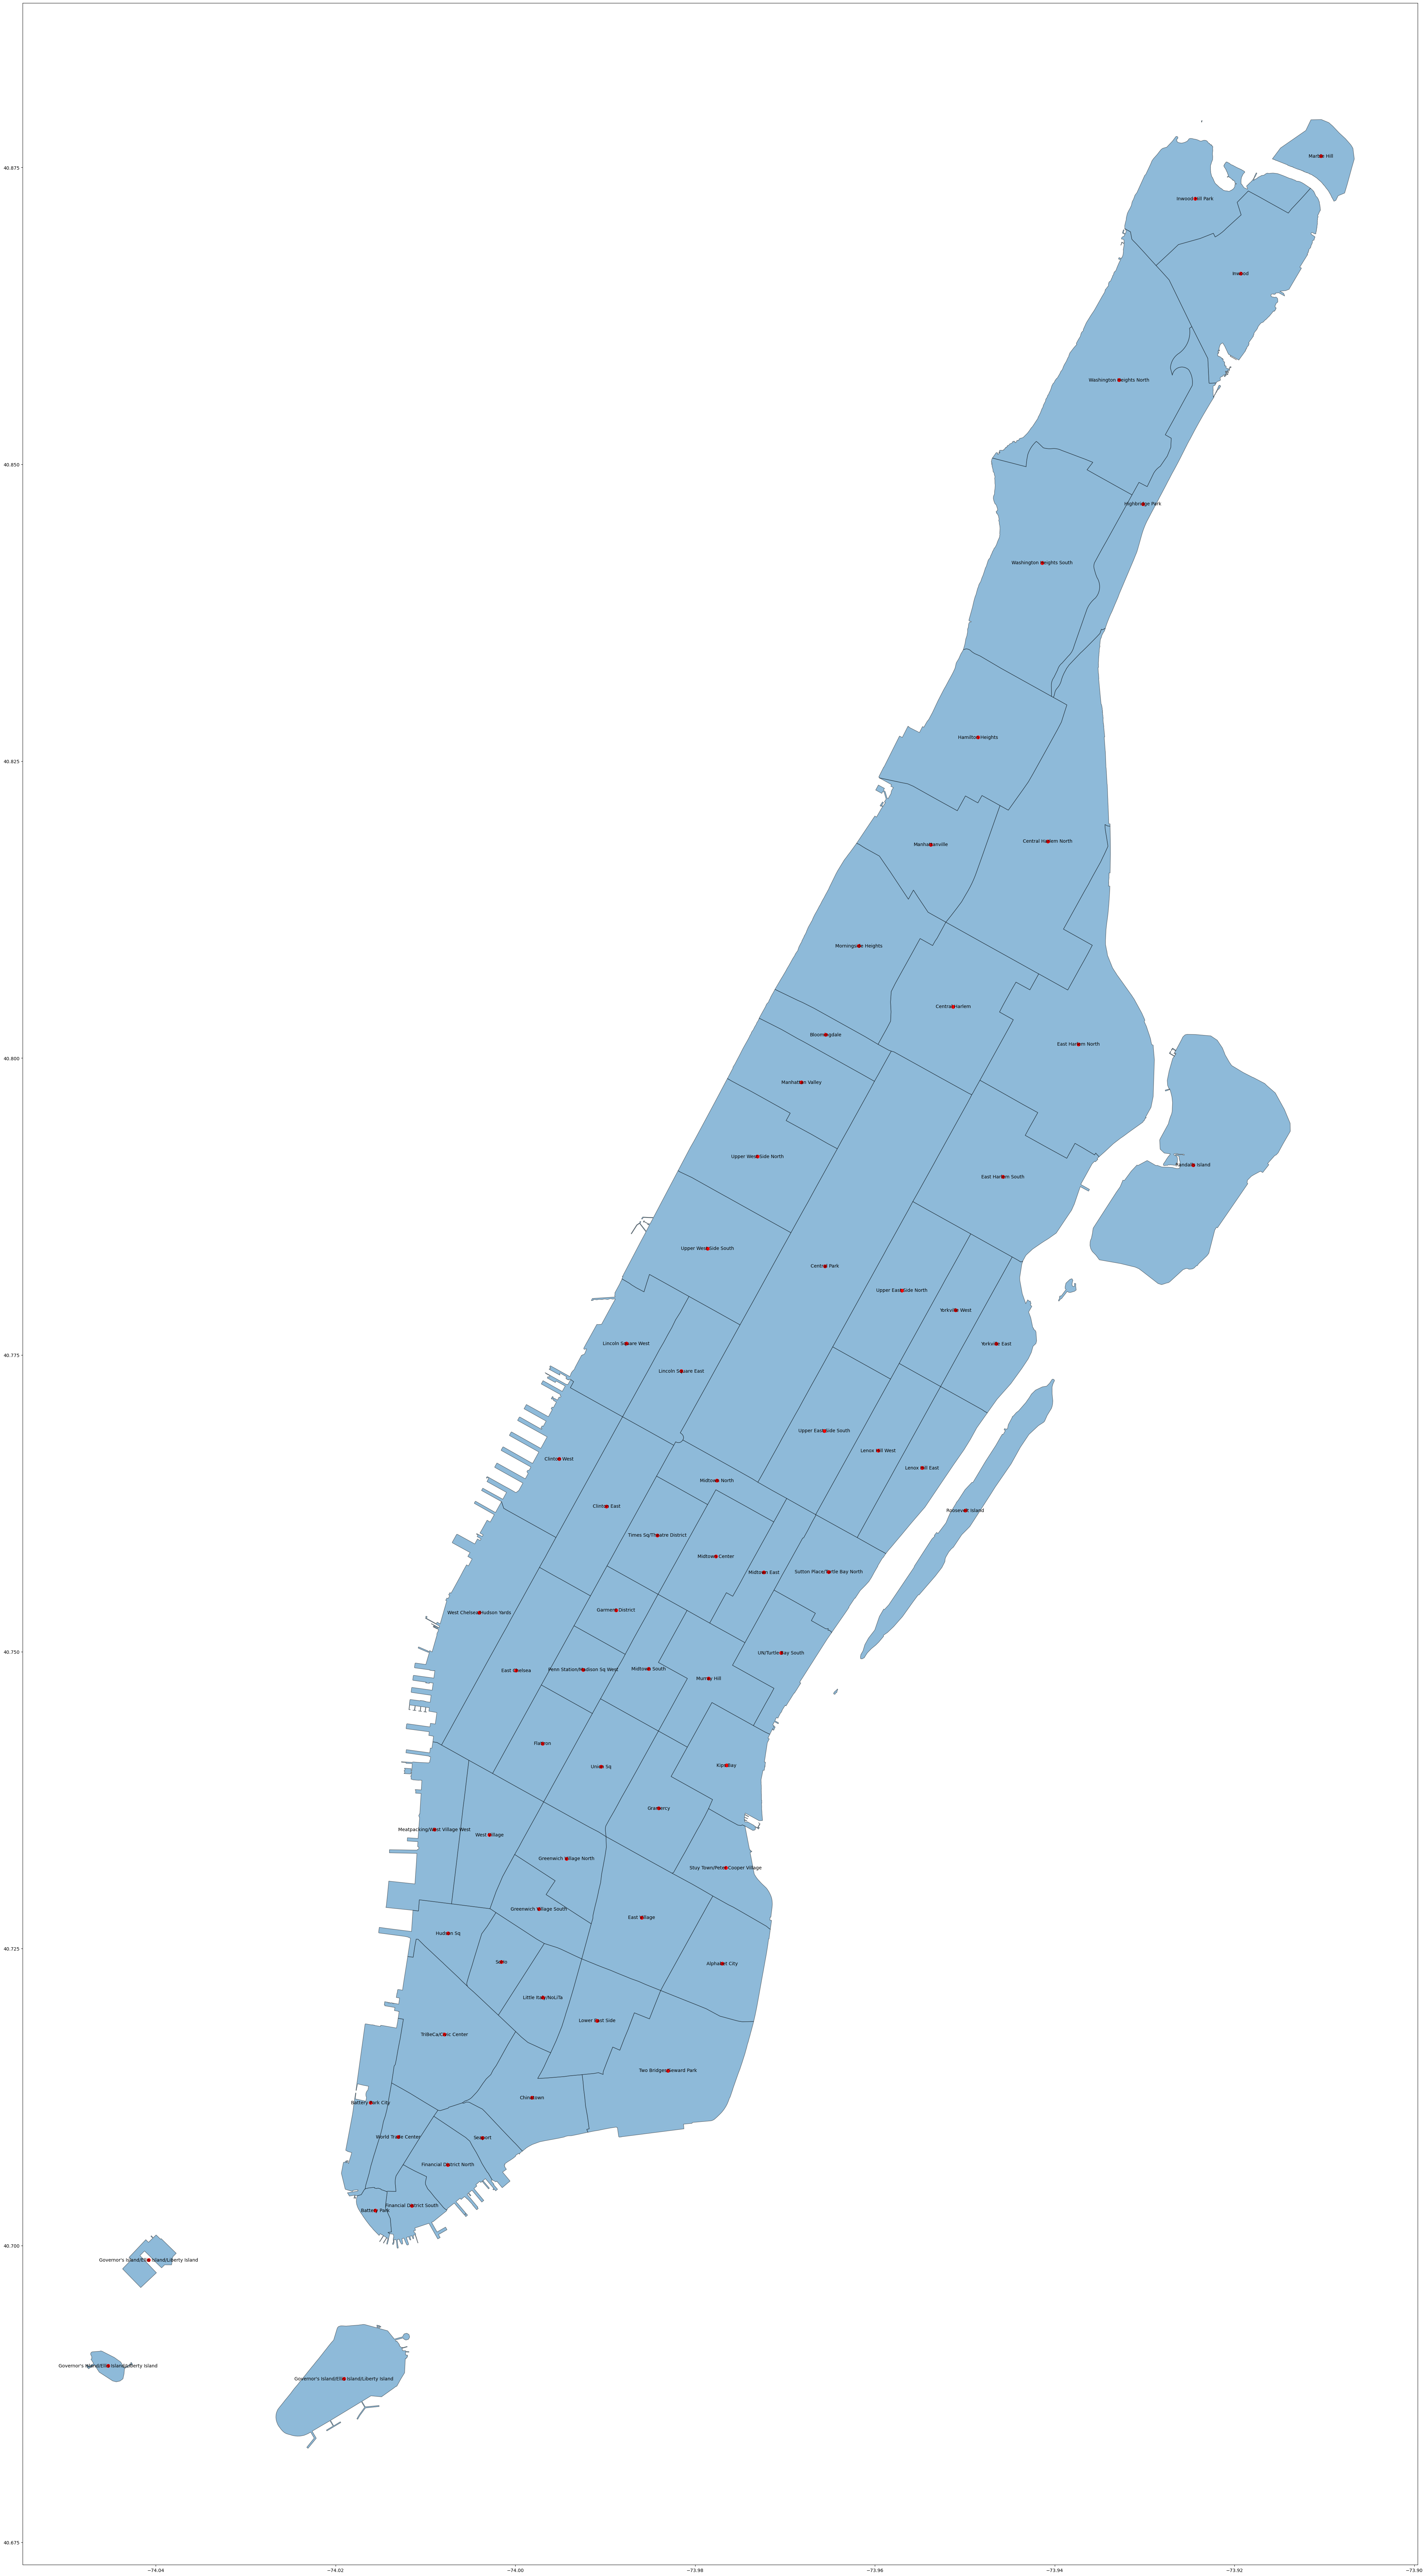

In [11]:
centroid = m_gdf.centroid # get the centroid
# m_zones = gdf['borough'].apply(lambda x:x=='Manhattan')
# zones = gdf['zone'][m_zones]
zones = m_gdf['zone']
# start draw
ax = m_gdf.plot(figsize=(100, 100), alpha=0.5, edgecolor='k') # plot the region
# Create a new GeoDataFrame containing the centroids and names
centroid_mgdf = gpd.GeoDataFrame({'name': zones, 'geometry': centroid}, crs=gdf.crs)
# Plot the centroid_gdf as a dot on the same plot, with names as labels
centroid_mgdf.plot(ax=ax, color='red', markersize=50)
for idx, row in centroid_mgdf.iterrows():
  ax.annotate(row['name'], xy=row['geometry'].coords[0], ha='center', va='center', color='black')

In [17]:
m_ids = m_gdf['location_id']
print(m_ids)

3        4
9       24
12      12
13      13
40      41
      ... 
246    244
248    246
251    249
261    261
262    262
Name: location_id, Length: 69, dtype: object


### Trip Data

In [2]:
data_path = 'data/yellow_tripdata_2022-01.parquet'
tripdata = pd.read_parquet(data_path)
tripdata

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               1  2022-01-01 00:35:40   2022-01-01 00:53:29              2.0   
1               1  2022-01-01 00:33:43   2022-01-01 00:42:07              1.0   
2               2  2022-01-01 00:53:21   2022-01-01 01:02:19              1.0   
3               2  2022-01-01 00:25:21   2022-01-01 00:35:23              1.0   
4               2  2022-01-01 00:36:48   2022-01-01 01:14:20              1.0   
...           ...                  ...                   ...              ...   
2463926         2  2022-01-31 23:36:53   2022-01-31 23:42:51              NaN   
2463927         2  2022-01-31 23:44:22   2022-01-31 23:55:01              NaN   
2463928         2  2022-01-31 23:39:00   2022-01-31 23:50:00              NaN   
2463929         2  2022-01-31 23:36:42   2022-01-31 23:48:45              NaN   
2463930         2  2022-01-31 23:46:00   2022-02-01 00:13:00              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 3.80         1.0                  N           142   
1                 2.10         1.0                  N           236   
2                 0.97         1.0                  N           166   
3                 1.09         1.0                  N           114   
4                 4.30         1.0                  N            68   
...                ...         ...                ...           ...   
2463926           1.32         NaN               None            90   
2463927           4.19         NaN               None           107   
2463928           2.10         NaN               None           113   
2463929           2.92         NaN               None           148   
2463930           8.94         NaN               None           186   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                 236             1        14.50    3.0      0.5        3.65   
1                  42             1         8.00    0.5      0.5        4.00   
2                 166             1         7.50    0.5      0.5        1.76   
3                  68             2         8.00    0.5      0.5        0.00   
4                 163             1        23.50    0.5      0.5        3.00   
...               ...           ...          ...    ...      ...         ...   
2463926           170             0         8.00    0.0      0.5        2.39   
2463927            75             0        16.80    0.0      0.5        4.35   
2463928           246             0        11.22    0.0      0.5        2.00   
2463929           164             0        12.40    0.0      0.5        0.00   
2463930           181             0        25.48    0.0      0.5        6.28   

         tolls_amount  improvement_surcharge  total_amount  \
0                 0.0                    0.3         21.95   
1                 0.0                    0.3         13.30   
2                 0.0                    0.3         10.56   
3                 0.0                    0.3         11.80   
4                 0.0                    0.3         30.30   
...               ...                    ...           ...   
2463926           0.0                    0.3         13.69   
2463927           0.0                    0.3         24.45   
2463928           0.0                    0.3         16.52   
2463929           0.0                    0.3         15.70   
2463930           0.0                    0.3         35.06   

         congestion_surcharge  airport_fee  
0                         2.5          0.0  
1                         0.0          0.0  
2                         0.0          0.0  
3                         2.5          0.0  
4                         2.5          0.0  
...                       ...          ...  
2463926                   NaN          NaN  
2463927                   NaN          NaN  
2463928                   NaN          NaN  
2463929                   N

In [13]:
tripdata['DOLocationID'].value_counts()

236    123470
237    106355
141     78341
239     75050
161     74707
        ...  
187        12
204         9
2           5
105         2
99          1
Name: DOLocationID, Length: 261, dtype: int64

In [14]:
tripdata['PULocationID'].value_counts()

237    121630
236    120814
132    103485
161     88237
186     80580
        ...  
105         1
172         1
176         1
27          1
187         1
Name: PULocationID, Length: 257, dtype: int64

检查263这个ID

In [15]:
is263 = tripdata['DOLocationID'].apply(lambda x: x==263)
tripdata[is263]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
19              1  2022-01-01 00:35:50   2022-01-01 00:48:33              2.0   
24              1  2022-01-01 00:46:41   2022-01-01 00:57:53              1.0   
41              2  2022-01-01 00:31:06   2022-01-01 00:58:26              3.0   
104             2  2022-01-01 00:40:12   2022-01-01 01:07:08              1.0   
137             2  2022-01-01 00:58:41   2022-01-01 01:26:42              1.0   
...           ...                  ...                   ...              ...   
2463633         2  2022-01-31 21:15:17   2022-01-31 21:33:02              NaN   
2463722         2  2022-01-31 21:53:05   2022-01-31 21:56:25              NaN   
2463784         2  2022-01-31 22:10:39   2022-01-31 22:25:54              NaN   
2463802         2  2022-01-31 22:40:59   2022-01-31 22:54:33              NaN   
2463826         2  2022-01-31 22:46:33   2022-01-31 22:54:03              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
19                3.90         1.0                  N           107   
24                1.60         1.0                  N           239   
41               19.14         2.0                  N           132   
104               5.43         1.0                  N            68   
137               6.05         1.0                  N           158   
...                ...         ...                ...           ...   
2463633           3.39         NaN               None           166   
2463722           1.15         NaN               None           141   
2463784           3.98         NaN               None            90   
2463802           5.55         NaN               None           148   
2463826           1.57         NaN               None           141   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
19                263             1        13.00    3.0      0.5        3.35   
24                263             1         8.00    3.0      0.5        2.35   
41                263             1        52.00    0.0      0.5       12.37   
104               263             1        21.00    0.5      0.5        4.00   
137               263             1        23.50    0.5      0.5        2.00   
...               ...           ...          ...    ...      ...         ...   
2463633           263             0        17.86    0.0      0.5        2.29   
2463722           263             0         7.70    0.0      0.5        2.33   
2463784           263             0        17.37    0.0      0.5        6.72   
2463802           263             0        20.96    0.0      0.5        3.96   
2463826           263             0         8.50    0.0      0.5        1.00   

         tolls_amount  improvement_surcharge  total_amount  \
19               0.00                    0.3         20.15   
24               0.00                    0.3         14.15   
41               6.55                    0.3         75.47   
104              0.00                    0.3         28.80   
137              0.00                    0.3         29.30   
...               ...                    ...           ...   
2463633          0.00                    0.3         23.45   
2463722          0.00                    0.3         13.33   
2463784          0.00                    0.3         27.39   
2463802          0.00                    0.3         28.22   
2463826          0.00                    0.3         12.80   

         congestion_surcharge  airport_fee  
19                        2.5         0.00  
24                        2.5         0.00  
41                        2.5         1.25  
104                       2.5         0.00  
137                       2.5         0.00  
...                       ...          ...  
2463633                   NaN          NaN  
2463722                   NaN          NaN  
2463784                   NaN          NaN  
2463802                   N

In [16]:
is263 = tripdata['PULocationID'].apply(lambda x: x==263)
tripdata[is263]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
20              1  2022-01-01 00:49:14   2022-01-01 00:58:29              2.0   
57              2  2022-01-01 00:15:42   2022-01-01 00:20:33              2.0   
65              2  2022-01-01 00:41:32   2022-01-01 00:45:35              1.0   
90              2  2022-01-01 00:56:12   2022-01-01 00:58:28              2.0   
92              2  2022-01-01 00:00:44   2022-01-01 00:08:54              1.0   
...           ...                  ...                   ...              ...   
2462975         2  2022-01-31 18:36:02   2022-01-31 18:39:44              NaN   
2463366         2  2022-01-31 19:52:00   2022-01-31 20:08:00              NaN   
2463403         2  2022-01-31 19:32:51   2022-01-31 19:44:42              NaN   
2463824         2  2022-01-31 22:25:26   2022-01-31 22:38:39              NaN   
2463848         1  2022-01-31 22:30:58   2022-01-31 22:41:59              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
20                3.20         1.0                  N           263   
57                1.33         1.0                  N           263   
65                1.11         1.0                  N           263   
90                0.77         1.0                  N           263   
92                2.17         1.0                  N           263   
...                ...         ...                ...           ...   
2462975           0.28         NaN               None           263   
2463366           2.43         NaN               None           263   
2463403           5.03         NaN               None           263   
2463824           2.76         NaN               None           263   
2463848           1.80         NaN               None           263   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
20                107             1        11.00    3.0      0.5        2.95   
57                140             1         6.00    0.5      0.5        1.96   
65                262             2         5.50    0.5      0.5        0.00   
90                141             1         4.00    0.5      0.5        1.56   
92                233             1         8.50    0.5      0.5        2.46   
...               ...           ...          ...    ...      ...         ...   
2462975           262             0        21.54    0.0      0.5        6.72   
2463366            24             0        12.33    0.0      0.5        3.36   
2463403            79             0        18.89    0.0      0.5        3.61   
2463824            24             0        12.67    0.0      0.5        3.43   
2463848           142             0         9.50    0.5      0.5        2.00   

         tolls_amount  improvement_surcharge  total_amount  \
20                0.0                    0.3         17.75   
57                0.0                    0.3         11.76   
65                0.0                    0.3          9.30   
90                0.0                    0.3          9.36   
92                0.0                    0.3         14.76   
...               ...                    ...           ...   
2462975           0.0                    0.3         31.56   
2463366           0.0                    0.3         18.99   
2463403           0.0                    0.3         25.80   
2463824           0.0                    0.3         19.40   
2463848           0.0                    0.3         15.30   

         congestion_surcharge  airport_fee  
20                        2.5          0.0  
57                        2.5          0.0  
65                        2.5          0.0  
90                        2.5          0.0  
92                        2.5          0.0  
...                       ...          ...  
2462975                   NaN          NaN  
2463366                   NaN          NaN  
2463403                   NaN          NaN  
2463824                   N

### Whole Year

In [18]:
data_path_list = [
  'data/yellow_tripdata_2022-01.parquet',
  'data/yellow_tripdata_2022-02.parquet',
  'data/yellow_tripdata_2022-03.parquet',
  'data/yellow_tripdata_2022-04.parquet',
  'data/yellow_tripdata_2022-05.parquet',
  'data/yellow_tripdata_2022-06.parquet',
  'data/yellow_tripdata_2022-07.parquet',
  'data/yellow_tripdata_2022-08.parquet',
  'data/yellow_tripdata_2022-09.parquet',
  'data/yellow_tripdata_2022-10.parquet',
  'data/yellow_tripdata_2022-11.parquet',
  'data/yellow_tripdata_2022-12.parquet'
]
dfs = []
for data_path in data_path_list:
  m_tripdata = pd.read_parquet(data_path)
  dfs.append(m_tripdata)
tripdata = pd.concat(dfs)


In [19]:
tripdata

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               1  2022-01-01 00:35:40   2022-01-01 00:53:29              2.0   
1               1  2022-01-01 00:33:43   2022-01-01 00:42:07              1.0   
2               2  2022-01-01 00:53:21   2022-01-01 01:02:19              1.0   
3               2  2022-01-01 00:25:21   2022-01-01 00:35:23              1.0   
4               2  2022-01-01 00:36:48   2022-01-01 01:14:20              1.0   
...           ...                  ...                   ...              ...   
3399544         2  2022-12-31 23:46:00   2023-01-01 00:11:00              NaN   
3399545         2  2022-12-31 23:13:24   2022-12-31 23:29:08              NaN   
3399546         2  2022-12-31 23:00:49   2022-12-31 23:26:57              NaN   
3399547         1  2022-12-31 23:02:50   2022-12-31 23:16:05              NaN   
3399548         2  2022-12-31 23:00:15   2022-12-31 23:22:56              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 3.80         1.0                  N           142   
1                 2.10         1.0                  N           236   
2                 0.97         1.0                  N           166   
3                 1.09         1.0                  N           114   
4                 4.30         1.0                  N            68   
...                ...         ...                ...           ...   
3399544          11.56         NaN               None            16   
3399545           5.06         NaN               None            75   
3399546          13.35         NaN               None           168   
3399547           0.00         NaN               None           238   
3399548           4.24         NaN               None            85   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                 236             1        14.50    3.0      0.5        3.65   
1                  42             1         8.00    0.5      0.5        4.00   
2                 166             1         7.50    0.5      0.5        1.76   
3                  68             2         8.00    0.5      0.5        0.00   
4                 163             1        23.50    0.5      0.5        3.00   
...               ...           ...          ...    ...      ...         ...   
3399544            36             0        39.55    0.0      0.5        8.21   
3399545            50             0        26.23    0.0      0.5        0.00   
3399546           197             0        47.73    0.0      0.5        9.85   
3399547           116             0        12.74    0.0      0.5        0.00   
3399548            37             0        19.60    0.0      0.5        4.00   

         tolls_amount  improvement_surcharge  total_amount  \
0                 0.0                    0.3         21.95   
1                 0.0                    0.3         13.30   
2                 0.0                    0.3         10.56   
3                 0.0                    0.3         11.80   
4                 0.0                    0.3         30.30   
...               ...                    ...           ...   
3399544           0.0                    1.0         49.26   
3399545           0.0                    1.0         30.23   
3399546           0.0                    1.0         59.08   
3399547           0.0                    1.0         16.74   
3399548           0.0                    1.0         25.10   

         congestion_surcharge  airport_fee  
0                         2.5          0.0  
1                         0.0          0.0  
2                         0.0          0.0  
3                         2.5          0.0  
4                         2.5          0.0  
...                       ...          ...  
3399544                   NaN          NaN  
3399545                   NaN          NaN  
3399546                   NaN          NaN  
3399547                   N

In [27]:
def isMahattan(loc_id):
  if loc_id in m_ids:
    return True
  else:
    return False

In [91]:
# m_zones = tripdata.apply(lambda row:(row['DOLocationID'] in m_ids or row['PULocationID'] in m_ids))
m_zones_d = tripdata['DOLocationID'].apply(isMahattan)
m_zones_p = tripdata['PULocationID'].apply(isMahattan)
m_tripdata = tripdata[(m_zones_d) & (m_zones_p)]
m_tripdata

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               1  2022-01-01 00:35:40   2022-01-01 00:53:29              2.0   
2               2  2022-01-01 00:53:21   2022-01-01 01:02:19              1.0   
3               2  2022-01-01 00:25:21   2022-01-01 00:35:23              1.0   
4               2  2022-01-01 00:36:48   2022-01-01 01:14:20              1.0   
5               1  2022-01-01 00:40:15   2022-01-01 01:09:48              1.0   
...           ...                  ...                   ...              ...   
3399530         2  2022-12-31 23:12:51   2022-12-31 23:27:23              NaN   
3399535         2  2022-12-31 23:28:11   2022-12-31 23:42:19              NaN   
3399538         2  2022-12-31 23:45:37   2022-12-31 23:59:30              NaN   
3399539         2  2022-12-31 23:22:09   2022-12-31 23:29:21              NaN   
3399547         1  2022-12-31 23:02:50   2022-12-31 23:16:05              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 3.80         1.0                  N           142   
2                 0.97         1.0                  N           166   
3                 1.09         1.0                  N           114   
4                 4.30         1.0                  N            68   
5                10.30         1.0                  N           138   
...                ...         ...                ...           ...   
3399530           3.24         NaN               None           141   
3399535           2.61         NaN               None           161   
3399538           5.44         NaN               None           162   
3399539           1.24         NaN               None           116   
3399547           0.00         NaN               None           238   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                 236             1        14.50    3.0      0.5        3.65   
2                 166             1         7.50    0.5      0.5        1.76   
3                  68             2         8.00    0.5      0.5        0.00   
4                 163             1        23.50    0.5      0.5        3.00   
5                 161             1        33.00    3.0      0.5       13.00   
...               ...           ...          ...    ...      ...         ...   
3399530            90             0        21.92    0.0      0.5        1.00   
3399535            75             0        15.54    0.0      0.5        3.00   
3399538            87             0        26.67    0.0      0.5        6.13   
3399539           244             0        12.96    0.0      0.5        2.89   
3399547           116             0        12.74    0.0      0.5        0.00   

         tolls_amount  improvement_surcharge  total_amount  \
0                0.00                    0.3         21.95   
2                0.00                    0.3         10.56   
3                0.00                    0.3         11.80   
4                0.00                    0.3         30.30   
5                6.55                    0.3         56.35   
...               ...                    ...           ...   
3399530          0.00                    1.0         26.92   
3399535          0.00                    1.0         22.54   
3399538          0.00                    1.0         36.80   
3399539          0.00                    1.0         17.35   
3399547          0.00                    1.0         16.74   

         congestion_surcharge  airport_fee  
0                         2.5          0.0  
2                         0.0          0.0  
3                         2.5          0.0  
4                         2.5          0.0  
5                         2.5          0.0  
...                       ...          ...  
3399530                   NaN          NaN  
3399535                   NaN          NaN  
3399538                   NaN          NaN  
3399539                   N

In [33]:
is264 = m_tripdata['DOLocationID'].apply(lambda x:x==264)
m_tripdata[is264]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1312            2  2022-01-01 00:41:51   2022-01-01 00:42:12              5.0   
1760            1  2022-01-01 00:36:35   2022-01-01 00:36:35              1.0   
2656            2  2022-01-01 00:57:52   2022-01-01 01:05:00              1.0   
2883            2  2022-01-01 00:16:25   2022-01-01 00:26:55              2.0   
4726            1  2022-01-01 01:59:36   2022-01-01 01:59:36              1.0   
...           ...                  ...                   ...              ...   
3395573         2  2022-12-30 16:21:00   2022-12-30 16:49:00              NaN   
3395861         1  2022-12-30 19:53:52   2022-12-30 20:23:09              NaN   
3396071         1  2022-12-30 21:02:57   2022-12-30 21:39:44              NaN   
3396369         1  2022-12-31 01:55:35   2022-12-31 02:12:18              NaN   
3397298         1  2022-12-31 17:31:46   2022-12-31 17:37:58              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
1312              2.31         1.0                  N           143   
1760              0.00         1.0                  N           132   
2656              0.60         1.0                  N           141   
2883              1.13         1.0                  N            68   
4726              0.00         1.0                  N           237   
...                ...         ...                ...           ...   
3395573           2.45         NaN               None           246   
3395861           1.00         NaN               None           161   
3396071          19.60         NaN               None           132   
3396369           0.00         NaN               None           236   
3397298           0.80         NaN               None           237   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
1312              264             2        12.00   0.50      0.5        0.00   
1760              264             2       115.00   1.75      0.5        0.00   
2656              264             1         5.00   0.50      0.5        1.76   
2883              264             1         8.00   0.50      0.5        0.00   
4726              264             2         2.50   3.00      0.5        0.00   
...               ...           ...          ...    ...      ...         ...   
3395573           264             0        25.39   0.00      0.5        5.88   
3395861           264             0        17.70   2.50      0.5        3.63   
3396071           264             0        70.00   1.25      0.5        7.93   
3396369           264             0        20.99   0.00      0.5        0.00   
3397298           264             0         7.20   0.00      0.5        1.68   

         tolls_amount  improvement_surcharge  total_amount  \
1312             0.00                    0.3         15.80   
1760             0.00                    0.3        117.55   
2656             0.00                    0.3         10.56   
2883             0.00                    0.3         11.80   
4726             0.00                    0.3          6.30   
...               ...                    ...           ...   
3395573          0.00                    1.0         35.27   
3395861          0.00                    1.0         27.83   
3396071          6.55                    1.0         87.23   
3396369          0.00                    1.0         24.99   
3397298          0.00                    1.0         12.88   

         congestion_surcharge  airport_fee  
1312                      2.5         0.00  
1760                      0.0         1.25  
2656                      2.5         0.00  
2883                      2.5         0.00  
4726                      2.5         0.00  
...                       ...          ...  
3395573                   NaN          NaN  
3395861                   NaN          NaN  
3396071                   NaN          NaN  
3396369                   N

In [34]:
is265 = m_tripdata['DOLocationID'].apply(lambda x:x==265)
m_tripdata[is265]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
154             2  2022-01-01 00:26:37   2022-01-01 00:39:35              1.0   
155             2  2022-01-01 00:26:37   2022-01-01 00:39:35              1.0   
601             1  2022-01-01 00:21:49   2022-01-01 00:43:51              1.0   
1390            2  2022-01-01 00:41:08   2022-01-01 01:09:08              2.0   
1404            2  2022-01-01 00:32:59   2022-01-01 01:05:34              1.0   
...           ...                  ...                   ...              ...   
3392835         1  2022-12-29 00:00:55   2022-12-29 00:24:22              NaN   
3393678         2  2022-12-29 15:07:31   2022-12-29 15:47:16              NaN   
3394885         2  2022-12-30 09:57:42   2022-12-30 10:22:40              NaN   
3396466         2  2022-12-31 03:39:00   2022-12-31 03:56:30              NaN   
3397740         2  2022-12-31 19:45:00   2022-12-31 20:20:00              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
154               7.38         1.0                  N           132   
155               7.38         1.0                  N           132   
601               9.00         1.0                  N           132   
1390             14.71         3.0                  N            87   
1404             27.85         4.0                  N           132   
...                ...         ...                ...           ...   
3392835           0.00         NaN               None            68   
3393678           9.33         NaN               None           238   
3394885           6.41         NaN               None           142   
3396466          10.44         NaN               None           141   
3397740          13.86         NaN               None           163   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
154               265             4       -21.00  -0.50     -0.5        0.00   
155               265             2        21.00   0.50      0.5        0.00   
601               265             1        26.50   1.75      0.5        5.80   
1390              265             1        58.50   0.50      0.0        0.00   
1404              265             1       124.50   0.50      0.5       25.16   
...               ...           ...          ...    ...      ...         ...   
3392835           265             0        26.00   1.00      0.5        4.28   
3393678           265             0        37.99   0.00      0.5        0.00   
3394885           265             0        33.46   0.00      0.5        9.07   
3396466           265             0        46.04   0.00      0.5        9.00   
3397740           265             0        62.08   0.00      0.0       15.37   

         tolls_amount  improvement_surcharge  total_amount  \
154              0.00                   -0.3        -23.55   
155              0.00                    0.3         23.55   
601              0.00                    0.3         34.85   
1390            11.75                    0.3         71.05   
1404             0.00                    0.3        152.21   
...               ...                    ...           ...   
3392835         11.75                    1.0         49.03   
3393678         11.75                    1.0         53.74   
3394885         23.00                    1.0         69.53   
3396466         11.75                    1.0         70.79   
3397740         13.75                    1.0         92.20   

         congestion_surcharge  airport_fee  
154                       0.0        -1.25  
155                       0.0         1.25  
601                       0.0         1.25  
1390                      0.0         0.00  
1404                      0.0         1.25  
...                       ...          ...  
3392835                   NaN          NaN  
3393678                   NaN          NaN  
3394885                   NaN          NaN  
3396466                   N

In [35]:
is264 = m_tripdata['PULocationID'].apply(lambda x:x==264)
m_tripdata[is264]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
885             2  2022-01-01 00:51:36   2022-01-01 00:51:57              1.0   
886             2  2022-01-01 00:51:36   2022-01-01 00:51:57              1.0   
1074            2  2022-01-01 00:07:06   2022-01-01 00:29:17              1.0   
1295            1  2022-01-01 00:46:59   2022-01-01 01:13:11              1.0   
2347            1  2022-01-01 00:47:00   2022-01-01 00:52:17              0.0   
...           ...                  ...                   ...              ...   
3397417         2  2022-12-31 17:36:17   2022-12-31 17:44:19              NaN   
3397889         2  2022-12-31 19:30:37   2022-12-31 19:45:06              NaN   
3398472         2  2022-12-31 20:56:28   2022-12-31 21:07:45              NaN   
3398583         2  2022-12-31 21:50:07   2022-12-31 22:13:52              NaN   
3399153         2  2022-12-31 22:05:25   2022-12-31 22:32:21              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
885               0.11         1.0                  N           264   
886               0.11         1.0                  N           264   
1074             14.94         1.0                  N           264   
1295              9.50         1.0                  N           264   
2347              0.60         1.0                  N           264   
...                ...         ...                ...           ...   
3397417           1.69         NaN               None           264   
3397889           2.49         NaN               None           264   
3398472           1.95         NaN               None           264   
3398583           4.22         NaN               None           264   
3399153           3.21         NaN               None           264   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
885               238             4        -2.50   -0.5     -0.5        0.00   
886               238             2         2.50    0.5      0.5        0.00   
1074               87             1        40.00    0.5      0.5       10.07   
1295               40             1        29.50    3.0      0.5        6.65   
2347              144             1         5.50    3.0      0.5        1.85   
...               ...           ...          ...    ...      ...         ...   
3397417           142             0        13.11    0.0      0.5        3.42   
3397889           141             0        17.14    0.0      0.5        4.23   
3398472           234             0        15.36    0.0      0.5        3.87   
3398583           114             0        24.55    0.0      0.5        0.00   
3399153           234             0        19.26    0.0      0.5        4.65   

         tolls_amount  improvement_surcharge  total_amount  \
885              0.00                   -0.3         -3.80   
886              0.00                    0.3          3.80   
1074             6.55                    0.3         60.42   
1295             0.00                    0.3         39.95   
2347             0.00                    0.3         11.15   
...               ...                    ...           ...   
3397417          0.00                    1.0         20.53   
3397889          0.00                    1.0         25.37   
3398472          0.00                    1.0         23.23   
3398583          0.00                    1.0         26.05   
3399153          0.00                    1.0         27.91   

         congestion_surcharge  airport_fee  
885                       0.0          0.0  
886                       0.0          0.0  
1074                      2.5          0.0  
1295                      2.5          0.0  
2347                      2.5          0.0  
...                       ...          ...  
3397417                   NaN          NaN  
3397889                   NaN          NaN  
3398472                   NaN          NaN  
3398583                   N

In [36]:
is265 = m_tripdata['PULocationID'].apply(lambda x:x==265)
m_tripdata[is265]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
51281           2  2022-01-01 19:33:48   2022-01-01 20:03:47              4.0   
73810           1  2022-01-02 11:26:57   2022-01-02 12:24:25              2.0   
98019           2  2022-01-02 17:09:15   2022-01-02 17:23:12              1.0   
105624          2  2022-01-02 19:44:15   2022-01-02 20:37:54              3.0   
143127          2  2022-01-03 12:42:33   2022-01-03 13:03:25              4.0   
...           ...                  ...                   ...              ...   
3345853         2  2022-12-16 04:01:35   2022-12-16 04:18:35              NaN   
3362218         2  2022-12-18 13:09:22   2022-12-18 14:02:41              NaN   
3374968         1  2022-12-21 16:54:32   2022-12-21 17:37:58              NaN   
3381851         1  2022-12-23 14:02:43   2022-12-23 15:15:22              NaN   
3387798         2  2022-12-25 20:04:00   2022-12-25 20:40:00              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
51281            17.69         5.0                  N           265   
73810            42.10         5.0                  N           265   
98019             6.66         1.0                  N           265   
105624           38.14         5.0                  N           265   
143127            4.82         5.0                  N           265   
...                ...         ...                ...           ...   
3345853          11.90         NaN               None           265   
3362218          26.94         NaN               None           265   
3374968           0.00         NaN               None           265   
3381851           0.00         NaN               None           265   
3387798          18.08         NaN               None           265   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
51281             236             1        63.00    0.0      0.0       14.47   
73810             142             1       150.00    0.0      0.0       31.35   
98019             132             1        20.50    0.0      0.5       20.00   
105624            132             1        80.00    0.0      0.0       10.00   
143127            233             1        40.00    0.0      0.5       12.99   
...               ...           ...          ...    ...      ...         ...   
3345853           138             0        40.69    0.0      0.5        8.30   
3362218           141             0        92.89    0.0      0.5       20.55   
3374968           230             0        49.50    2.5      0.5       13.95   
3381851           236             0        59.00    0.0      0.5       14.95   
3387798            13             0        71.36    0.0      0.5       15.07   

         tolls_amount  improvement_surcharge  total_amount  \
51281            6.55                    0.3         86.82   
73810            6.55                    0.3        188.20   
98019            0.00                    0.3         41.30   
105624          20.30                    0.3        110.60   
143127           0.00                    0.3         56.29   
...               ...                    ...           ...   
3345853          0.00                    0.3         49.79   
3362218          6.55                    0.3        123.29   
3374968         13.75                    1.0         83.70   
3381851         11.75                    1.0         89.70   
3387798          0.00                    1.0         90.43   

         congestion_surcharge  airport_fee  
51281                     2.5          0.0  
73810                     0.0          0.0  
98019                     0.0          0.0  
105624                    0.0          0.0  
143127                    2.5          0.0  
...                       ...          ...  
3345853                   NaN          NaN  
3362218                   NaN          NaN  
3374968                   NaN          NaN  
3381851                   N

观察曼哈顿街区的出发点

In [38]:
m_tripdata_p = tripdata[m_zones_p]
m_tripdata_p

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               1  2022-01-01 00:35:40   2022-01-01 00:53:29              2.0   
1               1  2022-01-01 00:33:43   2022-01-01 00:42:07              1.0   
2               2  2022-01-01 00:53:21   2022-01-01 01:02:19              1.0   
3               2  2022-01-01 00:25:21   2022-01-01 00:35:23              1.0   
4               2  2022-01-01 00:36:48   2022-01-01 01:14:20              1.0   
...           ...                  ...                   ...              ...   
3399539         2  2022-12-31 23:22:09   2022-12-31 23:29:21              NaN   
3399540         2  2022-12-31 23:01:46   2022-12-31 23:26:45              NaN   
3399542         2  2022-12-31 23:06:51   2022-12-31 23:17:08              NaN   
3399545         2  2022-12-31 23:13:24   2022-12-31 23:29:08              NaN   
3399547         1  2022-12-31 23:02:50   2022-12-31 23:16:05              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 3.80         1.0                  N           142   
1                 2.10         1.0                  N           236   
2                 0.97         1.0                  N           166   
3                 1.09         1.0                  N           114   
4                 4.30         1.0                  N            68   
...                ...         ...                ...           ...   
3399539           1.24         NaN               None           116   
3399540           3.97         NaN               None           107   
3399542           0.91         NaN               None            68   
3399545           5.06         NaN               None            75   
3399547           0.00         NaN               None           238   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                 236             1        14.50    3.0      0.5        3.65   
1                  42             1         8.00    0.5      0.5        4.00   
2                 166             1         7.50    0.5      0.5        1.76   
3                  68             2         8.00    0.5      0.5        0.00   
4                 163             1        23.50    0.5      0.5        3.00   
...               ...           ...          ...    ...      ...         ...   
3399539           244             0        12.96    0.0      0.5        2.89   
3399540            50             0        23.55    0.0      0.5        5.51   
3399542            48             0        17.65    0.0      0.5        4.33   
3399545            50             0        26.23    0.0      0.5        0.00   
3399547           116             0        12.74    0.0      0.5        0.00   

         tolls_amount  improvement_surcharge  total_amount  \
0                 0.0                    0.3         21.95   
1                 0.0                    0.3         13.30   
2                 0.0                    0.3         10.56   
3                 0.0                    0.3         11.80   
4                 0.0                    0.3         30.30   
...               ...                    ...           ...   
3399539           0.0                    1.0         17.35   
3399540           0.0                    1.0         33.06   
3399542           0.0                    1.0         25.98   
3399545           0.0                    1.0         30.23   
3399547           0.0                    1.0         16.74   

         congestion_surcharge  airport_fee  
0                         2.5          0.0  
1                         0.0          0.0  
2                         0.0          0.0  
3                         2.5          0.0  
4                         2.5          0.0  
...                       ...          ...  
3399539                   NaN          NaN  
3399540                   NaN          NaN  
3399542                   NaN          NaN  
3399545                   N

In [41]:
def getDataByTime(tripdata, start_time, end_time):
    tpep_pickup_datetime_requried = tripdata['tpep_pickup_datetime'].map(lambda x: x >= start_time )
    tpep_dropoff_datetime_requried = tripdata['tpep_dropoff_datetime'].map(lambda x: x <= end_time )
    filtered = tripdata[tpep_pickup_datetime_requried & tpep_dropoff_datetime_requried]
    filtered = filtered.reset_index()
    return filtered

In [44]:
def getTripData(data,start_time, end_time):
    # filter the invalid data
    # PULocationID_requried = tripdata['PULocationID'].map(lambda x : x<264) # 264 and 264 is the come from or go to udefined regions
    # DOLocationID_requried = tripdata['DOLocationID'].map(lambda x : x<264)
    # tripdata = tripdata[PULocationID_requried & DOLocationID_requried]
    start_time = pd.to_datetime(start_time)
    end_time = pd.to_datetime(end_time)
    tripdata = getDataByTime(data, start_time, end_time)
    tripdata['count']=1
    return tripdata

整年的周期性
规律的震荡曲线

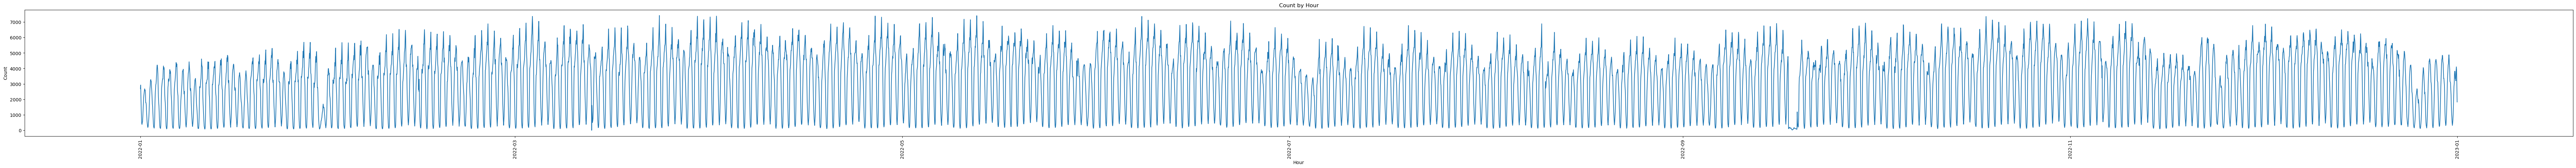

In [45]:
hourdata_p = getTripData(m_tripdata_p, '2022/01/01','2023/01/01')
hourdata_p=hourdata_p.set_index('tpep_pickup_datetime')
hourdata_p = pd.DataFrame(hourdata_p['count'].resample('H').count())
dv.bar_plot(hourdata_p, 'Hour', (100,5))

工作日与非工作日的分析

In [53]:
m_tripdata_p['dayname'] = m_tripdata_p['tpep_pickup_datetime'].dt.day_name()

/var/folders/z3/8n55n4g55ml3g61cmdvlw2mh0000gn/T/ipykernel_52185/3507419374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_tripdata_p['dayname'] = m_tripdata_p['tpep_pickup_datetime'].dt.day_name()


In [54]:
m_tripdata_p['dayname'].value_counts()

Thursday     4362202
Wednesday    4268088
Friday       4206383
Tuesday      4164297
Saturday     3887147
Monday       3662725
Sunday       3199765
Name: dayname, dtype: int64

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
def data_heatmap(data):
    # create a new dataframe with all possible combinations of PULocationID and DOLocationID
    heatmap_df = data.pivot(index='PULocationID', columns='PULocationID1', values='count')
    # heatmap_df = heatmap_df.reindex(range(1, 264), range(1, 264), fill_value=0)

    # create heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_df, cmap='YlGnBu')
    plt.title('Heatmap of Taxi Pick-up Locations')
    plt.xlabel('Pick-up Location')
    plt.ylabel('Pick-up Location')
    plt.show()

In [62]:
counts = m_tripdata_p[['PULocationID']].value_counts().reset_index(name='count')

In [69]:
counts['PULocationID1'] = counts['PULocationID']

In [70]:
counts

PULocationID    count  PULocationID1
0            132  1915375            132
1            237  1858969            237
2            236  1656140            236
3            161  1573000            161
4            142  1296787            142
..           ...      ...            ...
62           120      233            120
63           221       60            221
64           251       41            251
65           245       30            245
66           105       14            105

[67 rows x 3 columns]

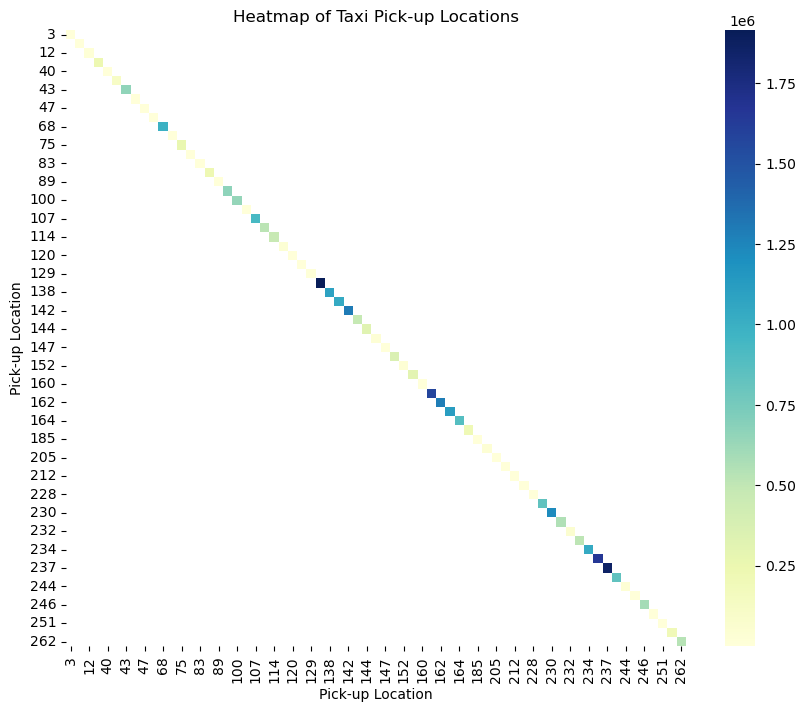

In [74]:
data_heatmap(counts)

In [76]:
isWeekday = m_tripdata_p['dayname'].apply(lambda x: (x != 'Sunday') & (x != 'Saturday'))
m_tripdata_p_weekday = m_tripdata_p[isWeekday]
m_tripdata_p_weekday

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
940             2  2021-12-31 23:52:28   2021-12-31 23:59:42              1.0   
1462            2  2021-12-31 23:57:19   2022-01-01 00:33:38              5.0   
1888            2  2021-12-31 23:56:26   2022-01-01 00:04:58              1.0   
2202            2  2021-12-31 23:54:56   2021-12-31 23:55:02              2.0   
2731            2  2021-12-31 23:05:27   2021-12-31 23:12:52              1.0   
...           ...                  ...                   ...              ...   
3396233         1  2022-12-30 23:23:35   2022-12-30 23:33:50              NaN   
3396234         2  2022-12-30 23:24:00   2022-12-30 23:41:00              NaN   
3396236         1  2022-12-30 23:02:50   2022-12-30 23:22:06              NaN   
3396238         2  2022-12-30 23:35:53   2022-12-30 23:46:34              NaN   
3396239         2  2022-12-30 23:01:03   2022-12-30 23:37:48              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
940               1.45         1.0                  N           238   
1462             21.13         1.0                  N           132   
1888              2.18         1.0                  N           237   
2202              0.00         1.0                  N           164   
2731              0.79         1.0                  N           144   
...                ...         ...                ...           ...   
3396233           0.00         NaN               None           141   
3396234           3.75         NaN               None           246   
3396236           2.70         NaN               None            68   
3396238           2.87         NaN               None            13   
3396239           5.36         NaN               None           230   

         DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
940               263             1  ...    0.5      0.5        2.82   
1462              181             1  ...    0.5      0.5       18.32   
1888               75             1  ...    0.5      0.5        2.46   
2202              164             1  ...    0.5      0.5        0.00   
2731               79             2  ...    0.5      0.5        0.00   
...               ...           ...  ...    ...      ...         ...   
3396233           170             0  ...    1.0      0.5        2.55   
3396234            87             0  ...    0.0      0.5        6.33   
3396236           237             0  ...    1.0      0.5        3.30   
3396238           232             0  ...    0.0      0.5        3.12   
3396239            45             0  ...    0.0      0.5       10.74   

         tolls_amount  improvement_surcharge  total_amount  \
940               0.0                    0.3         14.12   
1462              0.0                    0.3         79.37   
1888              0.0                    0.3         14.76   
2202              0.0                    0.3          6.30   
2731              0.0                    0.3         10.30   
...               ...                    ...           ...   
3396233           0.0                    1.0         21.55   
3396234           0.0                    1.0         37.99   
3396236           0.0                    1.0         25.30   
3396238           0.0                    1.0         23.92   
3396239           0.0                    1.0         46.55   

         congestion_surcharge  airport_fee  dayofweek  dayname  
940                       2.5         0.00          4   Friday  
1462                      0.0         1.25          4   Friday  
1888                      2.5         0.00          4   Friday  
2202                      2.5         0.00          4   Friday  
2731                      2.5         0.00          4   Friday  
...                       ...          ...        ...      ...  
3396233                   NaN          NaN          4   Friday  
3396234                   NaN          NaN          4

In [77]:
weekday_counts = m_tripdata_p_weekday[['PULocationID']].value_counts().reset_index(name='count')

In [79]:
weekday_counts

PULocationID    count
0            237  1484826
1            132  1365846
2            236  1324218
3            161  1259339
4            162  1026520
..           ...      ...
62           120      165
63           221       46
64           251       29
65           245       21
66           105       11

[67 rows x 2 columns]

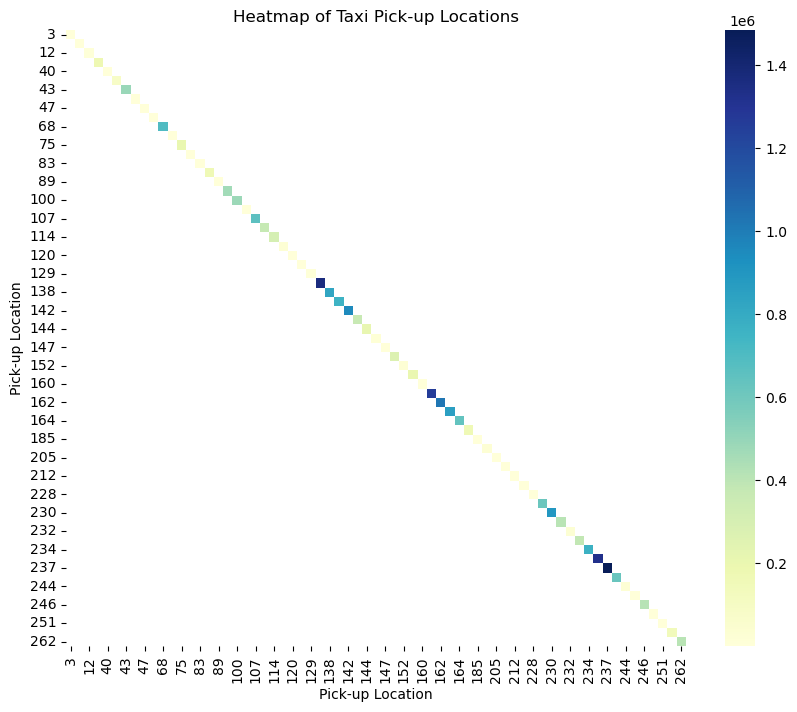

In [81]:
weekday_counts['PULocationID1'] = weekday_counts['PULocationID']
data_heatmap(weekday_counts)

In [82]:
isWeekend = m_tripdata_p['dayname'].apply(lambda x: (x == 'Sunday') | (x == 'Saturday'))
m_tripdata_p_weekend = m_tripdata_p[isWeekend]
m_tripdata_p_weekend

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               1  2022-01-01 00:35:40   2022-01-01 00:53:29              2.0   
1               1  2022-01-01 00:33:43   2022-01-01 00:42:07              1.0   
2               2  2022-01-01 00:53:21   2022-01-01 01:02:19              1.0   
3               2  2022-01-01 00:25:21   2022-01-01 00:35:23              1.0   
4               2  2022-01-01 00:36:48   2022-01-01 01:14:20              1.0   
...           ...                  ...                   ...              ...   
3399539         2  2022-12-31 23:22:09   2022-12-31 23:29:21              NaN   
3399540         2  2022-12-31 23:01:46   2022-12-31 23:26:45              NaN   
3399542         2  2022-12-31 23:06:51   2022-12-31 23:17:08              NaN   
3399545         2  2022-12-31 23:13:24   2022-12-31 23:29:08              NaN   
3399547         1  2022-12-31 23:02:50   2022-12-31 23:16:05              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 3.80         1.0                  N           142   
1                 2.10         1.0                  N           236   
2                 0.97         1.0                  N           166   
3                 1.09         1.0                  N           114   
4                 4.30         1.0                  N            68   
...                ...         ...                ...           ...   
3399539           1.24         NaN               None           116   
3399540           3.97         NaN               None           107   
3399542           0.91         NaN               None            68   
3399545           5.06         NaN               None            75   
3399547           0.00         NaN               None           238   

         DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
0                 236             1  ...    3.0      0.5        3.65   
1                  42             1  ...    0.5      0.5        4.00   
2                 166             1  ...    0.5      0.5        1.76   
3                  68             2  ...    0.5      0.5        0.00   
4                 163             1  ...    0.5      0.5        3.00   
...               ...           ...  ...    ...      ...         ...   
3399539           244             0  ...    0.0      0.5        2.89   
3399540            50             0  ...    0.0      0.5        5.51   
3399542            48             0  ...    0.0      0.5        4.33   
3399545            50             0  ...    0.0      0.5        0.00   
3399547           116             0  ...    0.0      0.5        0.00   

         tolls_amount  improvement_surcharge  total_amount  \
0                 0.0                    0.3         21.95   
1                 0.0                    0.3         13.30   
2                 0.0                    0.3         10.56   
3                 0.0                    0.3         11.80   
4                 0.0                    0.3         30.30   
...               ...                    ...           ...   
3399539           0.0                    1.0         17.35   
3399540           0.0                    1.0         33.06   
3399542           0.0                    1.0         25.98   
3399545           0.0                    1.0         30.23   
3399547           0.0                    1.0         16.74   

         congestion_surcharge  airport_fee  dayofweek   dayname  
0                         2.5          0.0          5  Saturday  
1                         0.0          0.0          5  Saturday  
2                         0.0          0.0          5  Saturday  
3                         2.5          0.0          5  Saturday  
4                         2.5          0.0          5  Saturday  
...                       ...          ...        ...       ...  
3399539                   NaN          NaN          5  Saturday  
3399540                   NaN          NaN   

In [83]:
weekend_counts = m_tripdata_p_weekend[['PULocationID']].value_counts().reset_index(name='count')

In [85]:
weekend_counts

PULocationID   count  PULocationID1
0            132  549529            132
1            237  374143            237
2            142  342994            142
3            236  331922            236
4            230  325033            230
..           ...     ...            ...
62             9      49              9
63           221      14            221
64           251      12            251
65           245       9            245
66           105       3            105

[67 rows x 3 columns]

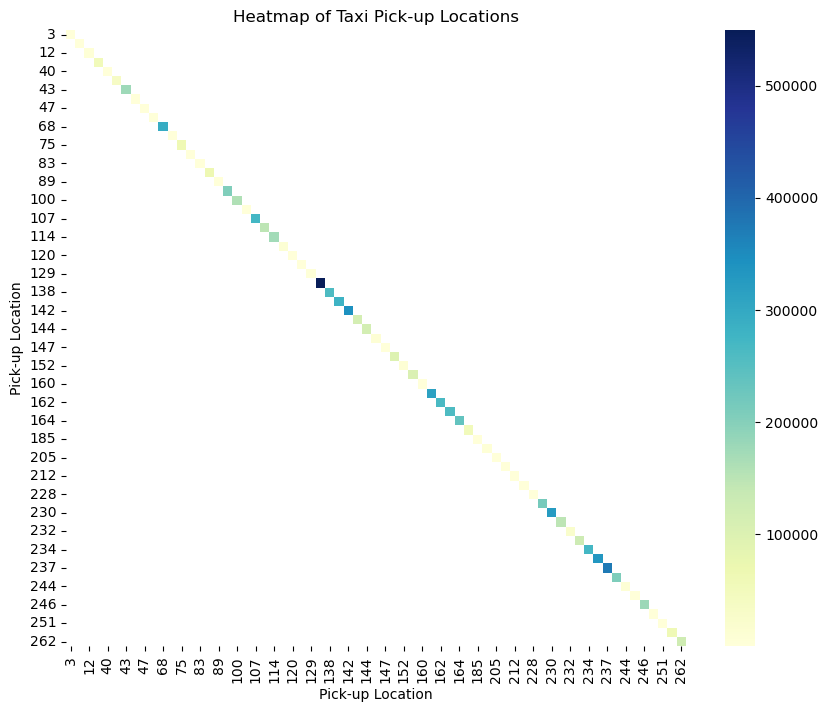

In [84]:
weekend_counts['PULocationID1'] = weekend_counts['PULocationID']
data_heatmap(weekend_counts)

In [86]:
counts.head(10)

PULocationID    count  PULocationID1
0           132  1915375            132
1           237  1858969            237
2           236  1656140            236
3           161  1573000            161
4           142  1296787            142
5           162  1291995            162
6           230  1220491            230
7           163  1117363            163
8           138  1088449            138
9           234  1039273            234

In [90]:
weekday_counts.head(15)

PULocationID    count  PULocationID1
0            237  1484826            237
1            132  1365846            132
2            236  1324218            236
3            161  1259339            161
4            162  1026520            162
5            142   953793            142
6            230   895458            230
7            163   856171            163
8            138   826660            138
9            234   767466            234
10           141   754275            141
11            68   698246             68
12           107   657481            107
13           164   643673            164
14           238   625650            238

In [89]:
weekend_counts.head(10)

PULocationID   count  PULocationID1
0           132  549529            132
1           237  374143            237
2           142  342994            142
3           236  331922            236
4           230  325033            230
5           161  313661            161
6            68  293302             68
7           141  279292            141
8           107  272135            107
9           234  271807            234